In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the CLEANED data from Notebook 01
df = pd.read_csv('../data/cleaned_churn_data.csv')

# Verify quickly that it's clean
print(df.shape)
df.head()

(223966, 12)


,customer_id,gender,age,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn,province,provider_nepal
0,2,F,55,2020-01-01,2,130556,62,39,5973,0,Karnali,Ncell
1,3,F,57,2020-01-01,0,148828,49,24,193,1,Koshi,Nepal Telecom (NTC)
2,4,M,46,2020-01-01,1,38722,80,25,9377,1,Bagmati,Nepal Telecom (NTC)
3,5,F,26,2020-01-01,2,55098,78,15,1393,0,Gandaki,Nepal Telecom (NTC)
4,6,M,36,2020-01-01,1,73452,91,24,8109,0,Sudurpashchim,Nepal Telecom (NTC)


In [2]:
df['date_of_registration'] = pd.to_datetime(df['date_of_registration'])
reference_date = df['date_of_registration'].max() 
df['tenure_months'] = ((reference_date - df['date_of_registration']).dt.days // 30)
df.drop('date_of_registration', axis=1, inplace=True)


In [3]:
df1 = df.drop(['customer_id'], axis=1)

In [4]:
df1.gender.replace({'M':1, 'F': 0}, inplace= True)

/tmp/ipykernel_68086/3179259331.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1.gender.replace({'M':1, 'F': 0}, inplace= True)
/tmp/ipykernel_68086/3179259331.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1.gender.replace({'M':1, 'F': 0}, inplace= True)


In [5]:
df1.gender.unique()

array([0, 1])

In [6]:
# This will show you the types of every column in your training data
print(X_train.dtypes)

# This counts how many columns are strings (object) vs numbers
print("\nColumn Count by Type:")
print(X_train.dtypes.value_counts())

NameError: name 'X_train' is not defined

In [ ]:
df1.churn.info()

In [7]:
df1 = pd.get_dummies(data= df1, columns = ['province', 'provider_nepal'])

In [8]:
df1

,gender,age,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn,tenure_months,province_Bagmati,province_Gandaki,province_Karnali,province_Koshi,province_Lumbini,province_Madhesh,province_Sudurpashchim,provider_nepal_Ncell,provider_nepal_Nepal Telecom (NTC)
0,0,55,2,130556,62,39,5973,0,40,False,False,True,False,False,False,False,True,False
1,0,57,0,148828,49,24,193,1,40,False,False,False,True,False,False,False,False,True
2,1,46,1,38722,80,25,9377,1,40,True,False,False,False,False,False,False,False,True
3,0,26,2,55098,78,15,1393,0,40,False,True,False,False,False,False,False,False,True
4,1,36,1,73452,91,24,8109,0,40,False,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223961,0,28,3,130580,28,9,4102,0,0,False,False,True,False,False,False,False,True,False
223962,0,52,0,82393,80,45,7521,0,0,False,False,False,True,False,False,False,True,False
223963,1,59,4,51298,26,4,6547,0,0,False,True,False,False,False,False,False,True,False
223964,1,49,2,83981,80,15,1125,0,0,False,False,False,False,True,False,False,False,True


In [9]:
X = df1.drop('churn', axis=1)
y = df1['churn']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler =  StandardScaler()
cols_to_scale = ['age', 'estimated_salary', 'calls_made', 'sms_sent', 'data_used', 'tenure_months', 'num_dependents']
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

In [11]:
X_test

,gender,age,num_dependents,estimated_salary,calls_made,sms_sent,data_used,tenure_months,province_Bagmati,province_Gandaki,province_Karnali,province_Koshi,province_Lumbini,province_Madhesh,province_Sudurpashchim,provider_nepal_Ncell,provider_nepal_Nepal Telecom (NTC)
87641,1,-1.648906,-0.707379,-1.717905,-0.476035,0.157366,1.767519,0.350524,False,False,True,False,False,False,False,False,True
142092,1,1.638412,-0.707379,-0.672558,-0.370693,0.861425,-0.359030,-0.501979,False,False,False,False,True,False,False,False,True
39731,0,0.055629,-1.414340,-0.483525,-1.494340,1.072643,0.345608,1.117777,False,False,True,False,False,False,False,True,False
178994,1,-0.979267,-0.000418,1.282392,-1.318770,0.861425,1.560127,-1.013481,False,True,False,False,False,False,False,False,True
114002,0,0.116506,0.706543,-1.214715,-0.405807,-1.109941,0.846014,0.009523,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152199,0,1.455783,1.413503,0.614630,1.314777,0.720613,0.025573,-0.587229,True,False,False,False,False,False,False,False,True
103223,0,0.299134,0.706543,-1.110111,0.612497,1.424672,-1.635311,0.094773,False,False,False,False,False,True,False,True,False
202145,1,-1.040143,-1.414340,-0.818498,-1.669910,0.791019,-1.052089,-1.354482,False,True,False,False,False,False,False,False,True
35364,0,-0.918391,0.706543,0.970070,1.139207,1.917514,-0.133041,1.203027,False,False,True,False,False,False,False,True,False


In [12]:
X_train

,gender,age,num_dependents,estimated_salary,calls_made,sms_sent,data_used,tenure_months,province_Bagmati,province_Gandaki,province_Karnali,province_Koshi,province_Lumbini,province_Madhesh,province_Sudurpashchim,provider_nepal_Ncell,provider_nepal_Nepal Telecom (NTC)
219201,1,-0.370505,-0.000418,-0.849533,0.015560,-0.405882,-0.966466,-1.695483,False,False,False,False,False,True,False,False,True
143824,1,-0.248752,-0.707379,-0.816874,1.244549,-1.109941,-1.012435,-0.501979,True,False,False,False,False,False,False,True,False
203030,0,1.212278,-0.707379,0.966344,-1.775252,1.635890,-0.918741,-1.439733,False,True,False,False,False,False,False,True,False
57866,1,-1.161896,0.706543,1.129292,1.033865,1.213455,1.695581,0.862026,False,False,False,False,True,False,False,True,False
102296,0,0.299134,-1.414340,0.145110,-0.792061,0.157366,-1.446518,0.180023,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0,-0.614010,-1.414340,0.897406,-0.405807,-0.335476,0.467025,-0.160978,False,False,False,False,True,False,False,True,False
103694,1,-1.222772,-0.000418,0.182772,-0.511149,0.509395,0.828468,0.094773,False,False,False,True,False,False,False,False,True
131932,1,0.603516,-0.707379,0.800521,-1.213428,0.086960,-0.619059,-0.331479,False,True,False,False,False,False,False,False,True
146867,0,0.299134,-0.707379,1.307944,0.928523,-0.265070,-1.114552,-0.501979,False,False,False,True,False,False,False,False,True


In [13]:
model_performance = {}

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

baseline_model = LogisticRegression(max_iter=1000, random_state=42, solver='saga',class_weight='balanced', n_jobs=-1)

baseline_model.fit(X_train, y_train)

y_pred_baseline = baseline_model.predict(X_test)

print(f"Baseline Accuracy: {accuracy_score(y_test, y_pred_baseline):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_baseline))
model_performance['Logistic Regression'] = baseline_model.score(X_test, y_test)

/home/sahajgyawali45/tf_venv/lib64/python3.12/site-packages/sklearn/linear_model/_logistic.py:1184: FutureWarning: 'n_jobs' has no effect since 1.8 and will be removed in 1.10. You provided 'n_jobs=-1', please leave it unspecified.
  warnings.warn(msg, category=FutureWarning)


Baseline Accuracy: 0.49

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.48      0.60     35844
           1       0.20      0.52      0.29      8950

    accuracy                           0.49     44794
   macro avg       0.50      0.50      0.45     44794
weighted avg       0.68      0.49      0.54     44794



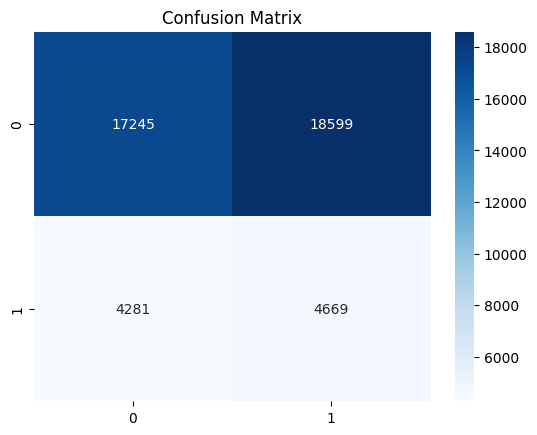

In [15]:
cm_base = confusion_matrix(y_test, y_pred_baseline)
cm_base
sns.heatmap(cm_base, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [16]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# 1. Calculate the class imbalance ratio
ratio = float(y_train.value_counts()[0]) / y_train.value_counts()[1]

# 2. Advanced GPU Configuration for >80% Accuracy
main_model = xgb.XGBClassifier(
    tree_method='hist',
    device='cuda',            # GPU Acceleration
    n_estimators=3000,        # Increased trees (Early stopping will prevent overfitting)
    learning_rate=0.01,       # Lower learning rate for more precise "sculpting" of weights
    max_depth=10,             # Deeper trees to catch complex interactions in 200k rows
    min_child_weight=5,       # Prevents the model from creating trees for very small noise groups
    gamma=0.2,                # Minimum loss reduction required to make a split (Regularization)
    scale_pos_weight=ratio,   # Vital for churn prediction
    subsample=0.8,            # Use 80% of data per tree to stay generalized
    colsample_bytree=0.8,     # Use 80% of features per tree
    random_state=42,
    early_stopping_rounds=100 # Be patient—allow the GPU to explore more iterations
)

# 3. Training with a detailed evaluation set
main_model.fit(
    X_train, y_train, 
    eval_set=[(X_test, y_test)], 
    verbose=100               # Monitor the validation loss every 100 rounds
)

# 4. Final Predictions
y_pred_mainmodel = main_model.predict(X_test)

# 5. Professional Results Display
print(f"XGBoost GPU Accuracy: {accuracy_score(y_test, y_pred_mainmodel):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_mainmodel))

[0]	validation_0-logloss:0.69308
[100]	validation_0-logloss:0.68654
[200]	validation_0-logloss:0.68164
[300]	validation_0-logloss:0.67749
[400]	validation_0-logloss:0.67388
[500]	validation_0-logloss:0.67056
[600]	validation_0-logloss:0.66721
[700]	validation_0-logloss:0.66411
[800]	validation_0-logloss:0.66111
[900]	validation_0-logloss:0.65823
[1000]	validation_0-logloss:0.65534
[1100]	validation_0-logloss:0.65266
[1200]	validation_0-logloss:0.64975
[1300]	validation_0-logloss:0.64730
[1400]	validation_0-logloss:0.64472
[1500]	validation_0-logloss:0.64225
[1600]	validation_0-logloss:0.63983
[1700]	validation_0-logloss:0.63752
[1800]	validation_0-logloss:0.63527
[1900]	validation_0-logloss:0.63311
[2000]	validation_0-logloss:0.63090
[2100]	validation_0-logloss:0.62884
[2200]	validation_0-logloss:0.62695
[2300]	validation_0-logloss:0.62497
[2400]	validation_0-logloss:0.62303
[2500]	validation_0-logloss:0.62109
[2600]	validation_0-logloss:0.61930
[2700]	validation_0-logloss:0.61758
[280

/home/sahajgyawali45/tf_venv/lib64/python3.12/site-packages/xgboost/core.py:774: UserWarning: [00:34:50] WARNING: /workspace/src/common/error_msg.cc:62: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


In [17]:
print(f" Accuracy: {accuracy_score(y_test, y_pred_mainmodel):.2f}")

 Accuracy: 0.70


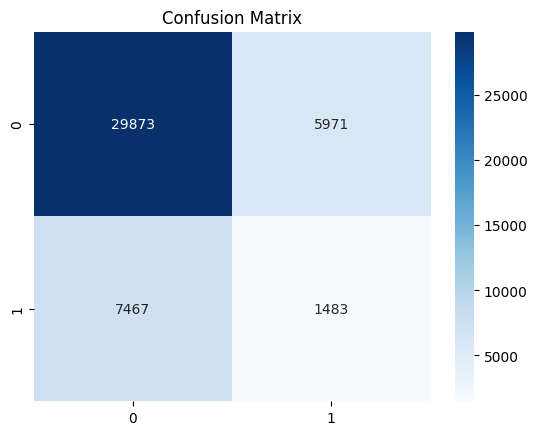

In [18]:
cm_main = confusion_matrix(y_test, y_pred_mainmodel)
cm_main
sns.heatmap(cm_main, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

2026-01-11 00:34:51.316211: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-01-11 00:34:51.345341: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-01-11 00:34:52.088217: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
/home/sahajgyawali45/tf_venv/lib64/python3.12/site-packages/keras/src/export/tf2onnx_lib.py

In [20]:

import tensorflow as tf
from tensorflow import keras

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# 1. Automatic Shape Detection
input_dim = X_train.shape[1] # This will be 17 automatically

# 2. Modern "Best" ANN for Churn
model = keras.Sequential([
    # This fixes the UserWarning and the ValueError
    layers.Input(shape=(input_dim,)), 
    
    # Layer 1: Captures broad signals
    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(), # Helps reach >70% accuracy
    layers.Dropout(0.2),         # Prevents overfitting
    
    # Layer 2: Refines patterns
    layers.Dense(16, activation='relu'),
    
    # Output Layer
    layers.Dense(1, activation='sigmoid'),
])

# 3. Compile
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 4. Training (This will now run perfectly)
history = model.fit(
    X_train, y_train, 
    epochs=50, 
    batch_size=64, 
    validation_data=(X_test, y_test)
)

I0000 00:00:1768070992.292089   68086 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6020 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


Epoch 1/50


2026-01-11 00:34:53.607778: I external/local_xla/xla/service/service.cc:163] XLA service 0x7f7e7c009b40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2026-01-11 00:34:53.607793: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2026-01-11 00:34:53.626477: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2026-01-11 00:34:53.771502: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91002


 110/2800 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7722 - loss: 0.5629

I0000 00:00:1768070994.865631   68274 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2800/2800 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7993 - loss: 0.5086 - val_accuracy: 0.8002 - val_loss: 0.5023
Epoch 2/50
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7999 - loss: 0.5019 - val_accuracy: 0.8002 - val_loss: 0.5016
Epoch 3/50
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7999 - loss: 0.5015 - val_accuracy: 0.8002 - val_loss: 0.5013
Epoch 4/50
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7999 - loss: 0.5011 - val_accuracy: 0.8002 - val_loss: 0.5016
Epoch 5/50
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7999 - loss: 0.5009 - val_accuracy: 0.8002 - val_loss: 0.5013
Epoch 6/50
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7999 - loss: 0.5007 - val_accuracy: 0.8002 - val_loss: 0.5004
Epoch 7/50
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7999 - loss: 0.5007 - val_accuracy: 0.8002 - val_loss: 0.5007
Epoch 8/50
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7999 - loss: 0.5005 - val_accurac